In [2]:
import torch
import torch.nn as nn
import torch.optim as optim

import helper_utils

# This line ensures that your results are reproducible and consistent every time.
torch.manual_seed(42)


### Data preparation and ingestion

In [3]:
distance = torch.tensor([[1.0],[2.0],[3.0],[4.0]],dtype=torch.float32)
times = torch.tensor([[6.96],[12.11],[16.77],[22.21]],dtype=torch.float32)

In [4]:
# torch1 = torch.tensor([
#     [1,2,3], [2,3,4]
# ], dtype= torch.float32 )
# torch1.shape
# distance.shape

### Model building 

Time = W × Distance + B

Use nn.Sequential(nn.Linear(1, 1)) to create a linear model.
nn.Linear(1, 1): The first 1 means it takes one input (distance), and the second 1 means one neuron that is producing one output (predicted time).

In [5]:
## # Model building

model = nn.Sequential(nn.Linear(1, 1))  # first 1 means it takes one input (distance), and the second 1 means one neuron that is producing one output (predicted time).



### Training

Loss Function The model's goal is to minimize this error.

Optimizer: adjusts your model's weight and bias parameters based on the errors. (loss func)

    lr: learning rate -> control the how large the adjustment steps will be. 
    

In [6]:
loss_function = nn.MSELoss()  # Mean Squared Error Loss
optimizer = optim.SGD(model.parameters(), lr=0.01)  # Stochastic Gradient Descent with learning rate of 0.01

In [7]:
# Training loop

for epoch in range(500):
    optimizer.zero_grad()  # Zero the gradients, so they don't accumulate
    output = model(distance)  # Forward pass: compute predicted y by passing x to the model
    loss = loss_function(output, times)  # Compute the loss
    loss.backward()  # Backward pass: compute gradient of the loss with respect to model parameters
    optimizer.step()  # Update the model parameters
    if (epoch+1) % 50 == 0:
        print(f'Epoch {epoch+1}, Loss: {loss.item():.4f}')


Epoch 50, Loss: 0.0394
Epoch 100, Loss: 0.0358
Epoch 150, Loss: 0.0331
Epoch 200, Loss: 0.0311
Epoch 250, Loss: 0.0296
Epoch 300, Loss: 0.0286
Epoch 350, Loss: 0.0277
Epoch 400, Loss: 0.0271
Epoch 450, Loss: 0.0267
Epoch 500, Loss: 0.0264


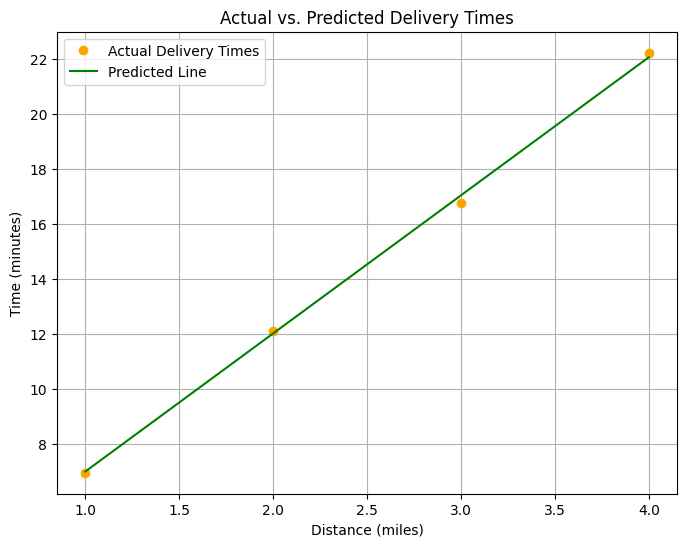

In [8]:
helper_utils.plot_results(model, distance, times)


In [9]:
distance_to_predict = 7.0

# Use the torch.no_grad() context manager for efficient predictions, you are telling PyTorch that you do not need to compute gradients for this operation.
with torch.no_grad():
    # Convert the Python variable into a 2D PyTorch tensor that the model expects
    new_distance = torch.tensor([[distance_to_predict]], dtype=torch.float32)
    
    # Pass the new data to the trained model to get a prediction
    predicted_time = model(new_distance)
    
    # Use .item() to extract the scalar value from the tensor for printing
    print(f"Prediction for a {distance_to_predict}-mile delivery: {predicted_time.item():.1f} minutes")

    # Use the scalar value in a conditional statement to make the final decision
    if predicted_time.item() > 30:
        print("\nDecision: Do NOT take the job. You will likely be late.")
    else:
        print("\nDecision: Take the job. You can make it!")

Prediction for a 7.0-mile delivery: 37.1 minutes

Decision: Do NOT take the job. You will likely be late.


### Access to the inside parameters


In [10]:
# Access the first (and only) layer in the sequential model
layer = model[0]

# Get weights and bias
weights = layer.weight.data.numpy()
bias = layer.bias.data.numpy()

print(f"Weight: {weights}")
print(f"Bias: {bias}")

Weight: [[5.015503]]
Bias: [1.9849645]


In [11]:
x = torch.tensor([25.0])
x = x.unsqueeze(0)
x = x.squeeze()
print(x.shape)

torch.Size([])
